Чернобаев А.А. М8О-114М-23 <br>
ЛР 2

Глобальная оптимизация и метаэврестические алгоритмы<br>
В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple, Callable, Union, List, Dict
import sympy as sp
import time
import pygmo as pg
import pandas as pd

In [46]:
resulting: Dict = {
    'Problem': [],
    'Method': [],
    'Pop size': [],
    'Generations': [],
    'Iterations': [],
    'Best points': [],
    'Best Values': []
}

In [47]:
def plot_func(func: Callable, x: np.ndarray, y: np.ndarray,
              name: str, min_point: np.ndarray, 
              found_point: Union[np.ndarray, None] = None) -> None:
    X, Y = np.meshgrid(x, y)
    Z = func(np.array([X, Y]))

    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
    ax.scatter(min_point[0], min_point[1], [func(min_point)], 
               color='black', s=55, alpha=1, 
               label=f'min point ({min_point[0]}, {min_point[1]})',
               marker='*')
    
    if found_point is not None:
        ax.scatter(found_point[0], found_point[1], [func(found_point)], 
               color='green', s=55, alpha=1, 
               label=f'found point ({found_point[0]}, {found_point[1]})',
               marker='x')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(name)

    ax.legend()
    fig.colorbar(surf)
    plt.show()

In [48]:
def rosenbrock(x: np.ndarray) -> float:
    return 100 * (x[1] - x[0]**2)**2 + (x[0] - 1)**2

In [49]:
def booth(x: np.ndarray) -> float:
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5) **2

In [50]:
class RosenbrockProblem():
    @staticmethod
    def fitness(x: List[float]) -> List[float]:
        return [100 * (x[1] - x[0]**2)**2 + (x[0] - 1)**2]
    
    
    @staticmethod
    def gradient(x: List[float]) -> List[float]:
        der_x = 100 * 2 * (x[1] - x[0]**2) * (-2) * x[0] + 2 * (x[0] - 1)
        der_y = 100 * 2 * (x[1] - x[0]**2)
        return [der_x, der_y]
    
    
    @staticmethod
    def get_bounds() -> List[List[float]]:
        return ([-4, -4], [4, 4])

In [51]:
class BoothProblem():
    @staticmethod
    def fitness(x: List[float]) -> List[float]:
        return [(x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5) **2]
    
    
    @staticmethod
    def gradient(x: List[float]) -> List[float]:
        der_x = 2 * (x[0] + 2*x[1] - 7) + 2 * (2*x[0] + x[1] - 5) * 2
        der_y = 2 * (x[0] + 2*x[1] - 7) * 2 + 2 * (2*x[0] + x[1] - 5)
        return np.array([der_x, der_y])
    
    
    @staticmethod
    def get_bounds() -> List[List[float]]:
        return ([-4, 1], [4, 7])

Исходные функции

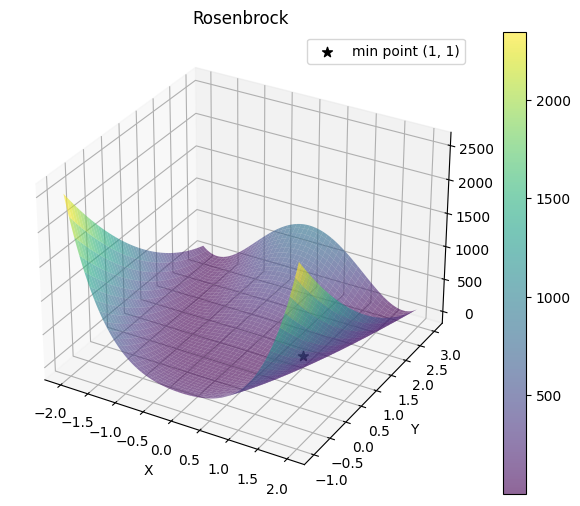

In [52]:
plot_func(rosenbrock, np.linspace(-2, 2, 200), np.linspace(-1, 3, 200),
          'Rosenbrock', np.array([1,1]))

In [53]:
def booth(x: np.ndarray) -> float:
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5) **2

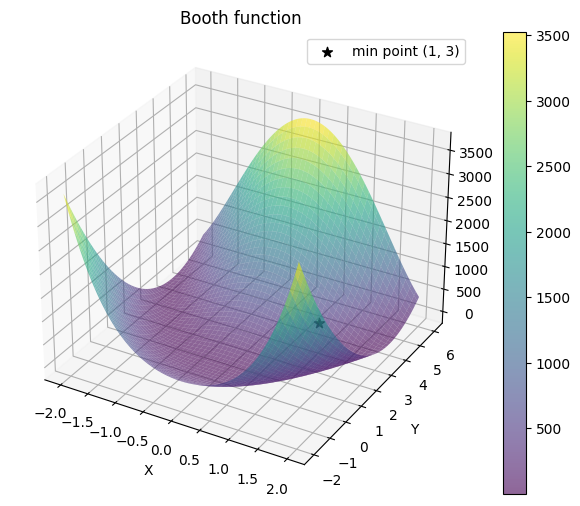

In [54]:
plot_func(rosenbrock, np.linspace(-2, 2, 200), np.linspace(-2, 6, 200),
          'Booth function', np.array([1,3]))

In [55]:
from typing import Dict
PygmoAlgo = type(pg.sga)
def solve_problem(problem_definition, pg_algo: PygmoAlgo, iter_count: int = 20,
                  population_size: int = 50) -> Tuple[float, float]:
    problem = pg.problem(problem_definition())
    algo = pg.algorithm(pg_algo())
    best_results = []

    for _ in range(iter_count):
        pop = pg.population(problem, size=population_size)

        pop = algo.evolve(pop)
        best_point = pop.champion_x
        best_val = pop.champion_f[0]
        
        best_results.append((best_point, best_val))

    return min(best_results, key=lambda x: x[1])

pygmo Simple Genetic Algorithm

In [56]:
from functools import partial
best_point, best_val = solve_problem(RosenbrockProblem, partial(pg.sga, gen=1000))
print(f"Best point: ({best_point[0]}, {best_point[1]})")
print(f"Best f(x): {best_val}", best_val)

resulting['Problem'].append('Rosenbrock')
resulting['Pop size'].append(50)
resulting['Method'].append('pg.sga')
resulting['Generations'].append(1000)
resulting['Iterations'].append(20)
resulting['Best points'].append(best_point)
resulting['Best Values'].append(best_val)

Best point: (1.0172906947327824, 1.0318582755817804)
Best f(x): 0.0012122660907266502 0.0012122660907266502


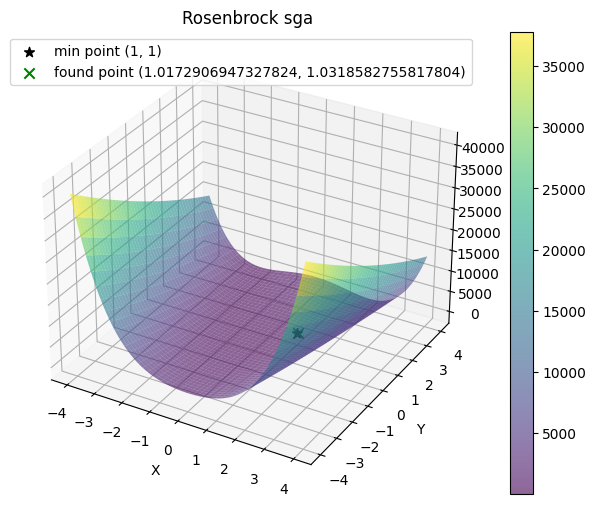

In [57]:
plot_func(rosenbrock, np.linspace(-4, 4, 200), np.linspace(-4, 4, 200),
          'Rosenbrock sga', np.array([1,1]), best_point)

In [58]:
best_point, best_val = solve_problem(BoothProblem, partial(pg.sga, gen=1000))
print(f"Best point: ({best_point[0]}, {best_point[1]})")
print(f"Best f(x): {best_val}", best_val)

resulting['Problem'].append('Booth')
resulting['Pop size'].append(50)
resulting['Method'].append('pg.sga')
resulting['Generations'].append(1000)
resulting['Iterations'].append(20)
resulting['Best points'].append(best_point)
resulting['Best Values'].append(best_val)

Best point: (0.9993941371456153, 3.0013165139401305)
Best f(x): 4.120378615568804e-06 4.120378615568804e-06


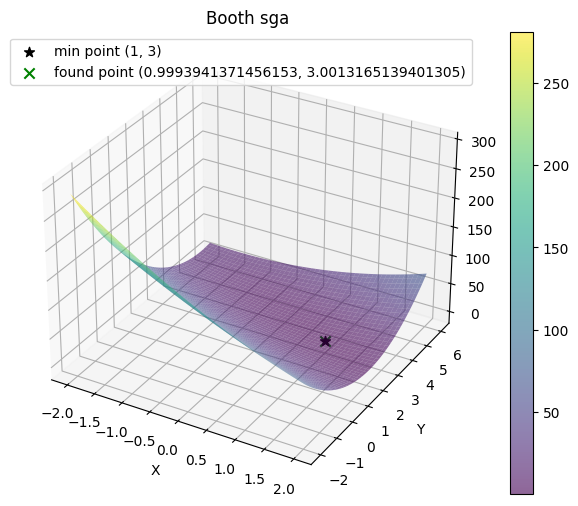

In [59]:
plot_func(booth, np.linspace(-2, 2, 200), np.linspace(-2, 6, 200),
          'Booth sga', np.array([1,3]), best_point)

pygmo Self-adaptive Differential Evolution

In [60]:
best_point, best_val = solve_problem(RosenbrockProblem, partial(pg.sade, gen=1000))
print(f"Best point: ({best_point[0]}, {best_point[1]})")
print(f"Best f(x): {best_val}", best_val)

resulting['Problem'].append('Rosenbrock')
resulting['Pop size'].append(50)
resulting['Method'].append('pg.sade')
resulting['Generations'].append(1000)
resulting['Iterations'].append(20)
resulting['Best points'].append(best_point)
resulting['Best Values'].append(best_val)

Best point: (0.9999999999961371, 0.9999999999919883)
Best f(x): 2.3094949917373962e-23 2.3094949917373962e-23


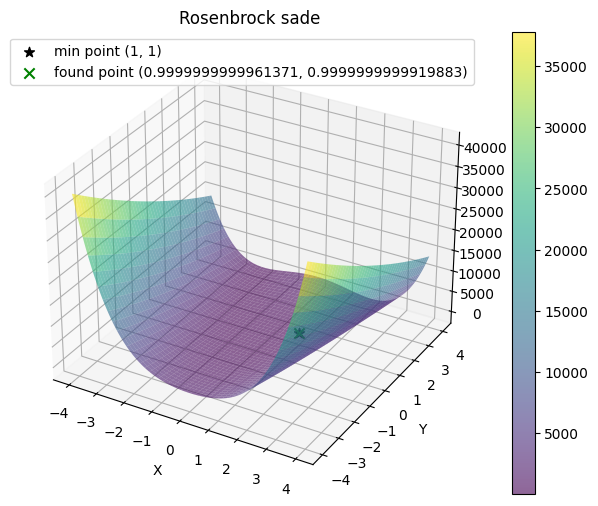

In [61]:
plot_func(rosenbrock, np.linspace(-4, 4, 200), np.linspace(-4, 4, 200),
          'Rosenbrock sade', np.array([1,1]), best_point)

In [62]:
best_point, best_val = solve_problem(BoothProblem, partial(pg.sade, gen=1000))
print(f"Best point: ({best_point[0]}, {best_point[1]})")
print(f"Best f(x): {best_val}", best_val)

resulting['Problem'].append('Booth')
resulting['Pop size'].append(50)
resulting['Method'].append('pg.sade')
resulting['Generations'].append(1000)
resulting['Iterations'].append(20)
resulting['Best points'].append(best_point)
resulting['Best Values'].append(best_val)

Best point: (0.9999999722935528, 2.9999999580855063)
Best f(x): 2.191277352770053e-14 2.191277352770053e-14


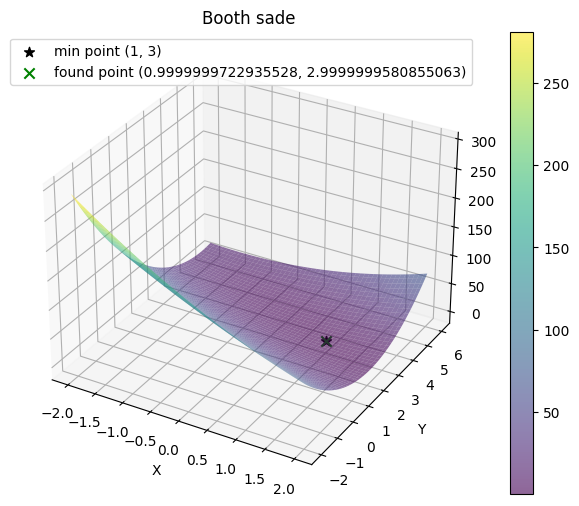

In [63]:
plot_func(booth, np.linspace(-2, 2, 200), np.linspace(-2, 6, 200),
          'Booth sade', np.array([1,3]), best_point)

pygmo Interior Point OPTimizer

In [64]:
best_point, best_val = solve_problem(RosenbrockProblem, pg.ipopt)
print(f"Best point: ({best_point[0]}, {best_point[1]})")
print(f"Best f(x): {best_val}", best_val)

resulting['Problem'].append('Rosenbrock')
resulting['Pop size'].append(50)
resulting['Method'].append('pg.ipopt')
resulting['Generations'].append('---')
resulting['Iterations'].append(20)
resulting['Best points'].append(best_point)
resulting['Best Values'].append(best_val)

Best point: (1.0000000000007883, 1.000000000001615)
Best f(x): 7.689125850802355e-25 7.689125850802355e-25


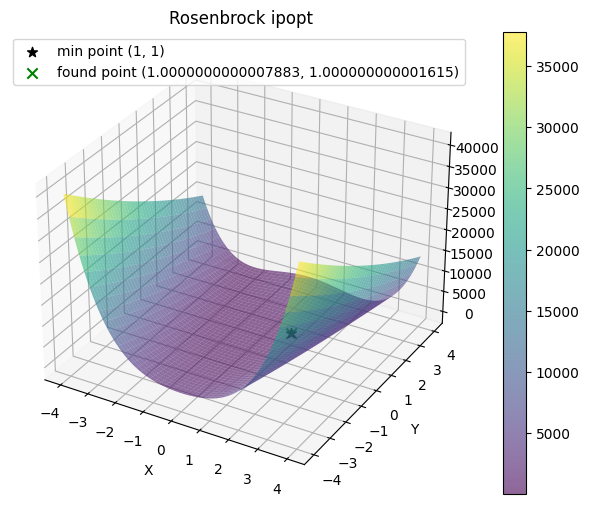

In [65]:
plot_func(rosenbrock, np.linspace(-4, 4, 200), np.linspace(-4, 4, 200),
          'Rosenbrock ipopt', np.array([1,1]), best_point)

In [66]:
best_point, best_val = solve_problem(BoothProblem, pg.ipopt)
print(f"Best point: ({best_point[0]}, {best_point[1]})")
print(f"Best f(x): {best_val}", best_val)

resulting['Problem'].append('Booth')
resulting['Pop size'].append(50)
resulting['Method'].append('pg.ipopt')
resulting['Generations'].append('---')
resulting['Iterations'].append(20)
resulting['Best points'].append(best_point)
resulting['Best Values'].append(best_val)

Best point: (1.0000000000110554, 2.9999999999791678)
Best f(x): 9.385645924719256e-22 9.385645924719256e-22


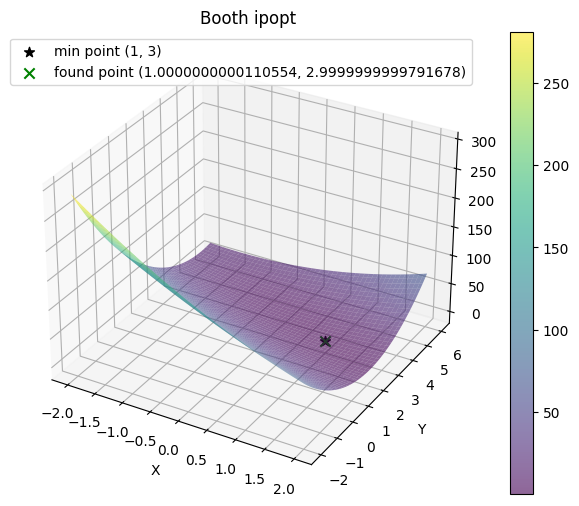

In [67]:
plot_func(booth, np.linspace(-2, 2, 200), np.linspace(-2, 6, 200),
          'Booth ipopt', np.array([1,3]), best_point)

Итоговая таблица

In [68]:
pd.DataFrame(resulting)

,Problem,Method,Pop size,Generations,Iterations,Best points,Best Values
0,Rosenbrock,pg.sga,50,1000,20,"[1.0172906947327824, 1.0318582755817804]",1.212266e-03
1,Booth,pg.sga,50,1000,20,"[0.9993941371456153, 3.0013165139401305]",4.120379e-06
2,Rosenbrock,pg.sade,50,1000,20,"[0.9999999999961371, 0.9999999999919883]",2.309495e-23
3,Booth,pg.sade,50,1000,20,"[0.9999999722935528, 2.9999999580855063]",2.191277e-14
4,Rosenbrock,pg.ipopt,50,---,20,"[1.0000000000007883, 1.000000000001615]",7.689126e-25
5,Booth,pg.ipopt,50,---,20,"[1.0000000000110554, 2.9999999999791678]",9.385646e-22
